In [1]:
"""
All tastes stacked
Different lambdas for each taste but same tau
SINGLE NEURON
"""

'\nAll tastes stacked\nDifferent lambdas for each taste but same tau\nSINGLE NEURON\n'

In [2]:
# Import stuff
import os
import scipy
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt
import theano

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
figsize(11, 9)

os.chdir('/media/bigdata/firing_space_plot/ephys_data')
from ephys_data import ephys_data
import visualize

In [3]:
data_dir = '/media/bigdata/Abuzar_Data/AS18/AS18_4Tastes_200228_151511/'
dat = \
    ephys_data(data_dir)
dat.firing_rate_params = dat.default_firing_params

dat.get_unit_descriptors()
dat.get_spikes()
dat.get_firing_rates()
dat.get_stft()
print(np.array(dat.spikes).shape)

All tastes have equal dimensions,concatenating and normalizing


/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/tables/leaf.py:410: PerformanceWarning: The Leaf ``/stft/stft_array`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)
/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/tables/leaf.py:410: PerformanceWarning: The Leaf ``/stft/amplitude_array`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in

(4, 30, 27, 7000)


In [4]:
print(dat.stft_array.shape)

(4, 18, 30, 10, 5000)


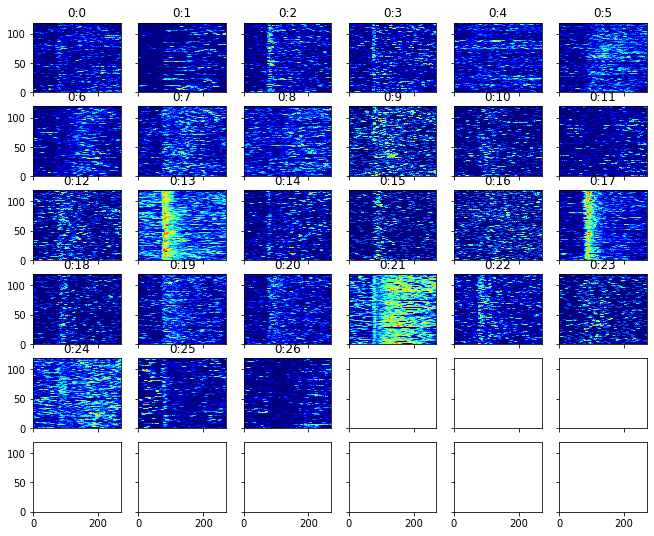

In [5]:
visualize.firing_overview(dat.all_normalized_firing);

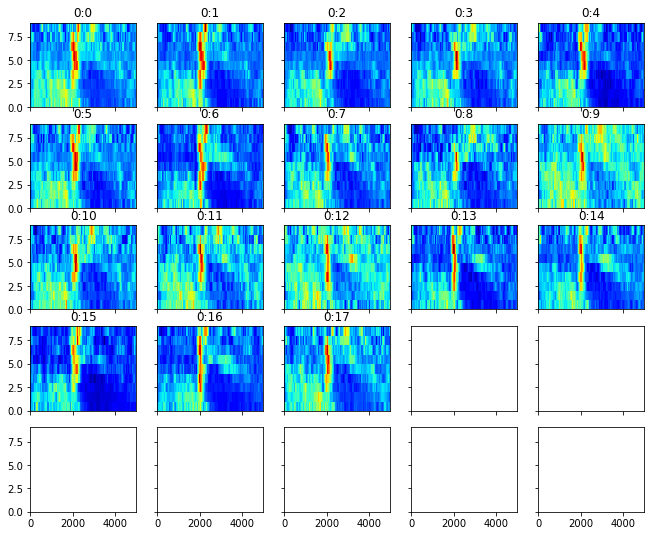

In [6]:
median_amplitude = np.median(dat.amplitude_array,axis=(0,2))
visualize.firing_overview(stats.zscore(median_amplitude,axis=-1));

In [7]:
nrn = np.arange(np.array(dat.spikes).shape[2])
taste_dat = np.array(dat.spikes)[:,:,nrn]
#taste_dat = np.array(dat.spikes)[:,:,nrn]
print(taste_dat.shape)

(4, 30, 27, 7000)


In [94]:
# Convert spikes to counts by binning
time_lims = [2000,4500]
bin_width = 10
t_vec = np.arange(taste_dat.shape[-1])
binned_t_vec = np.mean(t_vec[time_lims[0]:time_lims[1]].reshape((-1,bin_width)),axis=-1)
whole_dat_binned = np.sum(taste_dat.reshape(*taste_dat.shape[:-1],-1,bin_width),axis=-1)
this_dat_binned = np.sum(taste_dat[...,time_lims[0]:time_lims[1]].reshape(*taste_dat.shape[:-1],-1,bin_width),axis=-1)
this_dat_binned = np.vectorize(np.int)(this_dat_binned)

print(this_dat_binned.shape)
print(whole_dat_binned.shape)
print(binned_t_vec)

(4, 30, 27, 250)
(4, 30, 27, 700)
[2004.5 2014.5 2024.5 2034.5 2044.5 2054.5 2064.5 2074.5 2084.5 2094.5
 2104.5 2114.5 2124.5 2134.5 2144.5 2154.5 2164.5 2174.5 2184.5 2194.5
 2204.5 2214.5 2224.5 2234.5 2244.5 2254.5 2264.5 2274.5 2284.5 2294.5
 2304.5 2314.5 2324.5 2334.5 2344.5 2354.5 2364.5 2374.5 2384.5 2394.5
 2404.5 2414.5 2424.5 2434.5 2444.5 2454.5 2464.5 2474.5 2484.5 2494.5
 2504.5 2514.5 2524.5 2534.5 2544.5 2554.5 2564.5 2574.5 2584.5 2594.5
 2604.5 2614.5 2624.5 2634.5 2644.5 2654.5 2664.5 2674.5 2684.5 2694.5
 2704.5 2714.5 2724.5 2734.5 2744.5 2754.5 2764.5 2774.5 2784.5 2794.5
 2804.5 2814.5 2824.5 2834.5 2844.5 2854.5 2864.5 2874.5 2884.5 2894.5
 2904.5 2914.5 2924.5 2934.5 2944.5 2954.5 2964.5 2974.5 2984.5 2994.5
 3004.5 3014.5 3024.5 3034.5 3044.5 3054.5 3064.5 3074.5 3084.5 3094.5
 3104.5 3114.5 3124.5 3134.5 3144.5 3154.5 3164.5 3174.5 3184.5 3194.5
 3204.5 3214.5 3224.5 3234.5 3244.5 3254.5 3264.5 3274.5 3284.5 3294.5
 3304.5 3314.5 3324.5 3334.5 3344.5 3354.5 

(4, 27, 50)


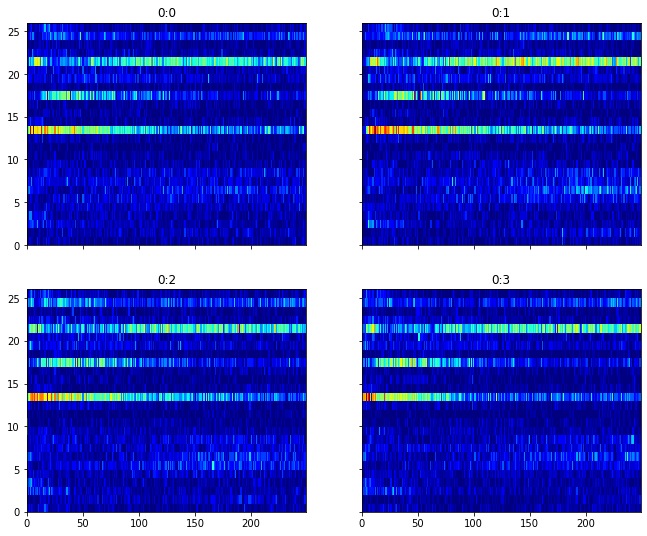

In [45]:
mean_this_dat = np.mean(this_dat_binned,axis=1)
print(zscore_this_dat.shape)
visualize.firing_overview(mean_this_dat);

(120, 27, 250)
(120, 27, 700)


<Figure size 792x648 with 0 Axes>

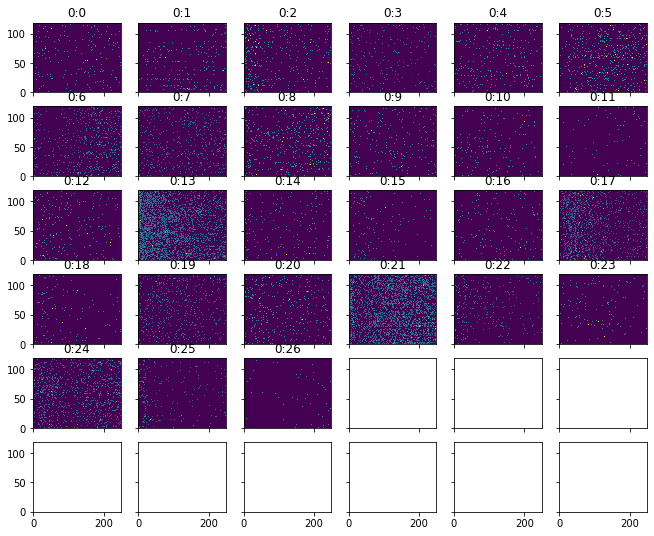

In [96]:
# Pick single trial
trial = np.arange(taste_dat.shape[1])
taste = np.arange(taste_dat.shape[0])

dat_binned_long = np.reshape(this_dat_binned,(-1,*this_dat_binned.shape[-2:]))
whole_dat_binned_long = np.reshape(whole_dat_binned,(-1,*whole_dat_binned.shape[-2:]))
print(dat_binned_long.shape)
plt.figure();
visualize.firing_overview(dat_binned_long.swapaxes(0,1),cmap='viridis');
print(whole_dat_binned_long.shape)
#dat_binned_long[dat_binned_long>1] = 1
# plt.figure();
# visualize.firing_overview(dat_binned_long.swapaxes(0,1),cmap='viridis');

In [47]:
states = 3
tastes = this_dat_binned.shape[0]
split_list = np.array_split(this_dat_binned,states,axis=-1)
# Cut all to the same size
min_val = min([x.shape[-1] for x in split_list])
split_array = np.array([x[...,:min_val] for x in split_list])
print(split_array.shape)
mean_vals = np.mean(split_array,axis=(2,-1)).swapaxes(0,1)
mean_vals += 0.01 # To avoid zero starting prob
print(mean_vals.shape) # Trials x nrns
# print(mean_vals)
mean_nrn_vals = np.mean(mean_vals,axis=(0,1))
print(mean_nrn_vals.shape) # Trials x nrns

(3, 4, 30, 27, 83)
(4, 3, 27)
(27,)


In [48]:
idx = np.arange(this_dat_binned.shape[-1]) # Index
array_idx = np.broadcast_to(idx, dat_binned_long.shape)
idx_range = idx.max() - idx.min()
print(idx.min())
print(idx.max())
print(array_idx.shape)

0
249
(120, 27, 250)


In [49]:
even_switches = np.linspace(0,idx.max(),states+1)
even_switches_normal = even_switches/np.max(even_switches)
print(even_switches)
print(even_switches_normal[1:(states)])

[  0.  83. 166. 249.]
[0.33333333 0.66666667]


(27,)
(3, 27)
(4, 3, 27)


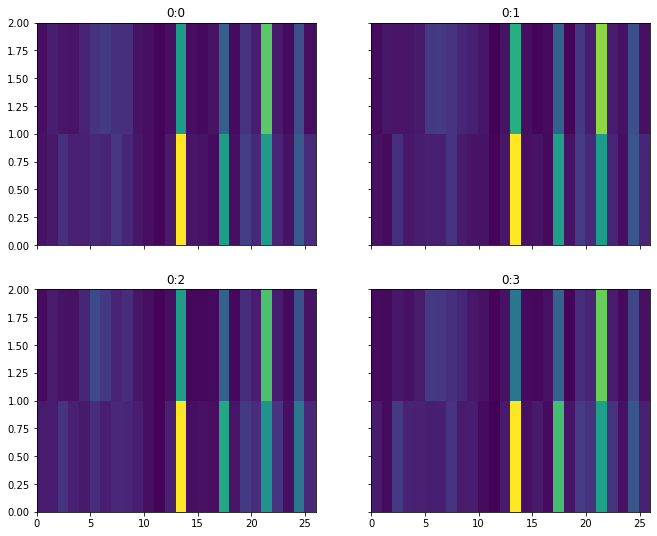

In [50]:
with pm.Model() as model:
    
    
    # SAME LAMBDAS ACROSS ALL TRIALS
    # Finite, but somewhere on the lower end, Beta prior
    # Shared hyperprior for single neuron (across tastes and states)
#     a_lambda = 2
#     b_lambda = 5
    # Priors for each neuron
    lambda_nrn = pm.Exponential('lambda_nrn',1/mean_nrn_vals, shape = (mean_vals.shape[-1]))
#     b_lambda = pm.HalfNormal('b_lambda',3, shape = (mean_vals.shape[-1]))
    
    # Priors for each state, derived from each neuron
    lambda_state = pm.Exponential('lambda_state',lambda_nrn, shape = (mean_vals.shape[1:]))
#     sig_lambda_state = pm.HalfNormal('sig_lambda_state',b_lambda, shape = (mean_vals.shape[1:]))
#     a_lambda_state = pm.HalfNormal('a_lambda_state',a_lambda, shape = (mean_vals.shape[1:]))
#     b_lambda_state = pm.HalfNormal('b_lambda_state',b_lambda, shape = (mean_vals.shape[1:]))
    
    lambda_latent = pm.Exponential('lambda', lambda_state[np.newaxis,:,:], testval = mean_vals, 
                            shape = (mean_vals.shape))

print(lambda_nrn.tag.test_value.shape)
print(lambda_state.tag.test_value.shape)
print(lambda_latent.tag.test_value.shape)

visualize.firing_overview(lambda_latent.tag.test_value,cmap='viridis');

In [51]:
trial_num = array_idx.shape[0]

with model:
    
    # INDEPENDENT TAU FOR EVERY TRIAL
    a = pm.HalfNormal('a_tau', 3., shape = states - 1)
    b = pm.HalfNormal('b_tau', 3., shape = states - 1)
    
    # Stack produces states x trials --> That gets transposed to trials x states and gets sorted along states (axis=-1)
    # Sort should work the same way as the Ordered transform --> see rv_sort_test.ipynb

    tau_latent = pm.Beta('tau_latent', a, b, 
                           shape = (trial_num, states-1),
                        testval = tt.tile(even_switches_normal[1:(states)],(array_idx.shape[0],1))).sort(axis=-1)
       
    tau = pm.Deterministic('tau', idx.min() + (idx.max() - idx.min()) * tau_latent)

print(tau.tag.test_value.shape)
tau_test_value = tau.tag.test_value

(120, 2)


In [52]:
print(array_idx.shape)

(120, 27, 250)


In [53]:
print(tt.tile(array_idx,(3,1,1,1)).swapaxes(0,1).tag.test_value.shape)

(120, 3, 27, 250)


In [54]:
with model:
    
    # Assign lambdas to time_bin indices using sigmoids centered on switchpoints
    # Refer to https://www.desmos.com/calculator/yisbydv2cq
    
    weight_1_stack = tt.nnet.sigmoid(array_idx - tau[:,0][...,np.newaxis,np.newaxis])
    weight_2_stack = tt.nnet.sigmoid(array_idx - tau[:,1][...,np.newaxis,np.newaxis])
    #weight_3_stack = tt.nnet.sigmoid(array_idx - tau[:,2][...,np.newaxis,np.newaxis])

#     tau = tau[...,np.newaxis,np.newaxis]
#     weight_stack = tt.nnet.sigmoid(tt.tile(array_idx,(states-1,1,1,1)).swapaxes(0,1) - tau)
    
print(weight_1_stack.tag.test_value.shape)
print(lambda_latent.tag.test_value.shape)

(120, 27, 250)
(4, 3, 27)


In [55]:
weight_1_test =  weight_1_stack.tag.test_value[0]
lambda_latent_test = lambda_latent.tag.test_value[0]
print(weight_1_test.shape)
print(lambda_latent_test.shape)

(27, 250)
(3, 27)


In [56]:
with model:
    
    taste_label = np.repeat([0,1,2,3],30)
    
    # 3 states
    lambda_ = np.multiply(1 - weight_1_stack, lambda_latent[taste_label,0][:,:,np.newaxis]) + \
                np.multiply(weight_1_stack * (1 - weight_2_stack), lambda_latent[taste_label][:,1][:,:,np.newaxis]) + \
                np.multiply(weight_2_stack, lambda_latent[taste_label,2][:,:,np.newaxis])
    
#     # 4 states
#     lambda_ = np.multiply(1 - weight_1_stack, lambda_latent[taste_label,0][:,:,np.newaxis]) + \
#                 np.multiply(weight_1_stack * (1 - weight_2_stack), lambda_latent[taste_label][:,1][:,:,np.newaxis]) + \
#                 np.multiply(weight_2_stack * (1 - weight_3_stack), lambda_latent[taste_label][:,2][:,:,np.newaxis]) + \
#                 np.multiply(weight_3_stack, lambda_latent[taste_label,3][:,:,np.newaxis])

#     lambda_latent_temp = lambda_latent[taste_label,:,:,np.newaxis]
#     print(lambda_latent.tag.test_value.shape)
#     print(lambda_latent_temp.tag.test_value.shape)
    
#     lambda_ = np.multiply(1 - weight_stack[:,0], lambda_latent_temp[:,0]) + \
#                 np.multiply(weight_stack[:,0] * (1 - weight_stack[:,1]), lambda_latent_temp[:,1]) + \
#                 np.multiply(weight_stack[:,1] * (1 - weight_stack[:,2]), lambda_latent_temp[:,2]) + \
#                 np.multiply(weight_stack[:,2], lambda_latent_temp[:,3])

/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


(120, 27, 250)
(120, 27, 250)


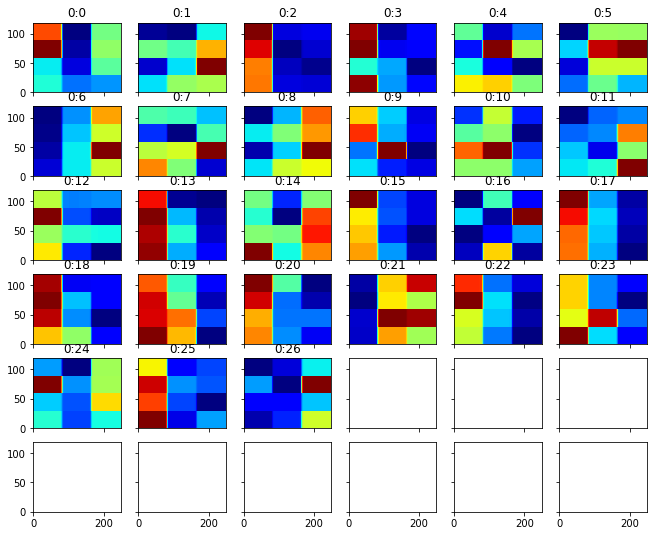

<Figure size 792x648 with 0 Axes>

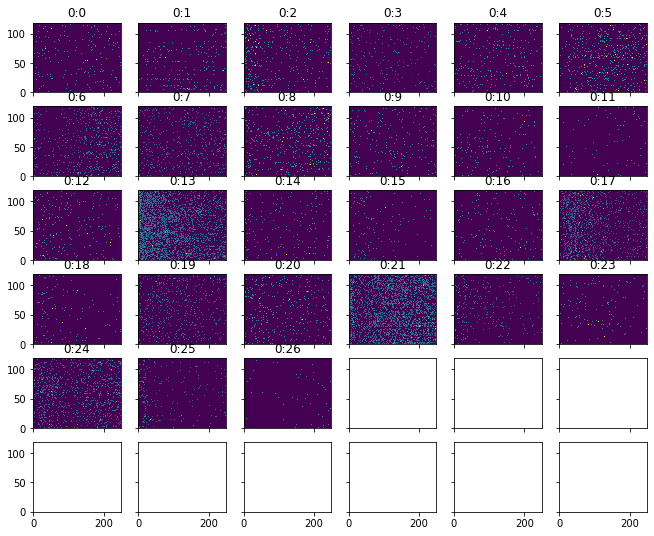

In [57]:
# print(taste_label)
print(weight_1_stack.tag.test_value.shape)
print(lambda_.tag.test_value.shape)
visualize.firing_overview(lambda_.tag.test_value.swapaxes(0,1));
plt.figure()
visualize.firing_overview(dat_binned_long.swapaxes(0,1),cmap='viridis');

In [58]:
# Using Bernoullo likelihood for count data
with model:
    observation = pm.Poisson("obs", lambda_, observed=dat_binned_long)

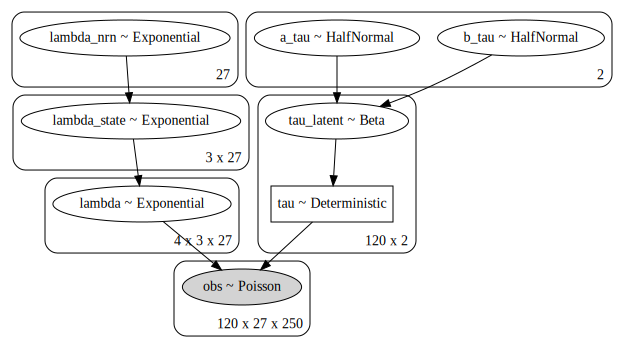

In [59]:
pm.model_to_graphviz(model)

In [60]:
with model:
    #step= pm.Metropolis()
    #step= pm.NUTS()
    #trace = pm.sample(100, tune=10,
    #                  step = step,
    #                  chains = 30, cores = 30)
    inference = pm.ADVI('full-rank')
    approx = pm.fit(n=40000, method=inference)
    trace = approx.sample(draws=10000)

  0%|          | 0/40000 [00:00<?, ?it/s]/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 1.8003e+05: 100%|██████████| 40000/40000 [40:25<00:00, 16.49it/s]  
Finished [100%]: Average Loss = 1.8003e+05


In [80]:
pm.save_trace(trace,os.path.join(data_dir,'saved_models',f'vi_{states}_states'))

'/media/bigdata/Abuzar_Data/AS18/AS18_4Tastes_200228_151511/saved_models/vi_3_states'

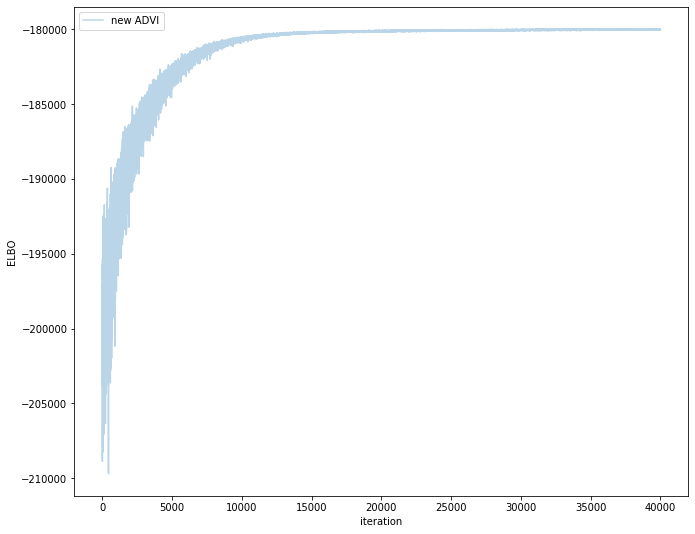

In [61]:
plt.plot(-inference.hist, label='new ADVI', alpha=.3)
#plt.plot(approx.hist, label='old ADVI', alpha=.3)
plt.legend()
plt.ylabel('ELBO')
plt.xlabel('iteration');

In [62]:
print(trace['tau_latent'].shape)

(10000, 120, 2)


In [63]:
# pm.autocorrplot(trace['tau_latent'][:,0,0]);
# pm.autocorrplot(trace['tau_latent'][::20,0,0]);

In [64]:
trace['lambda'].shape

(10000, 4, 3, 27)

/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

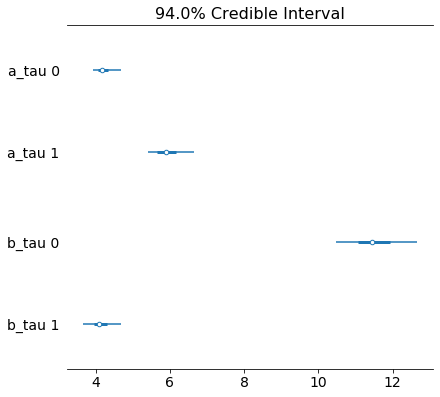

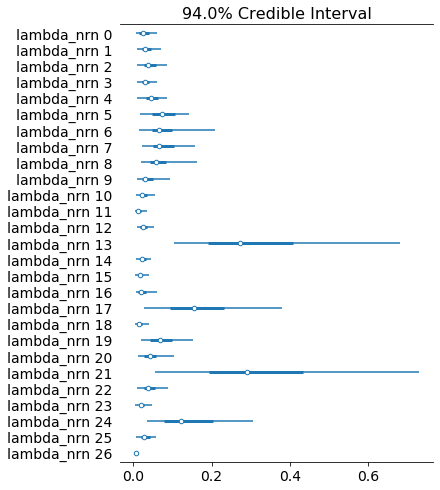

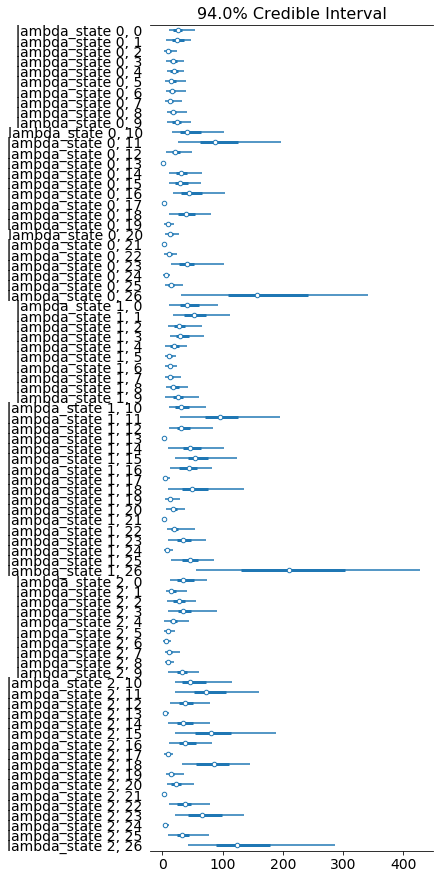

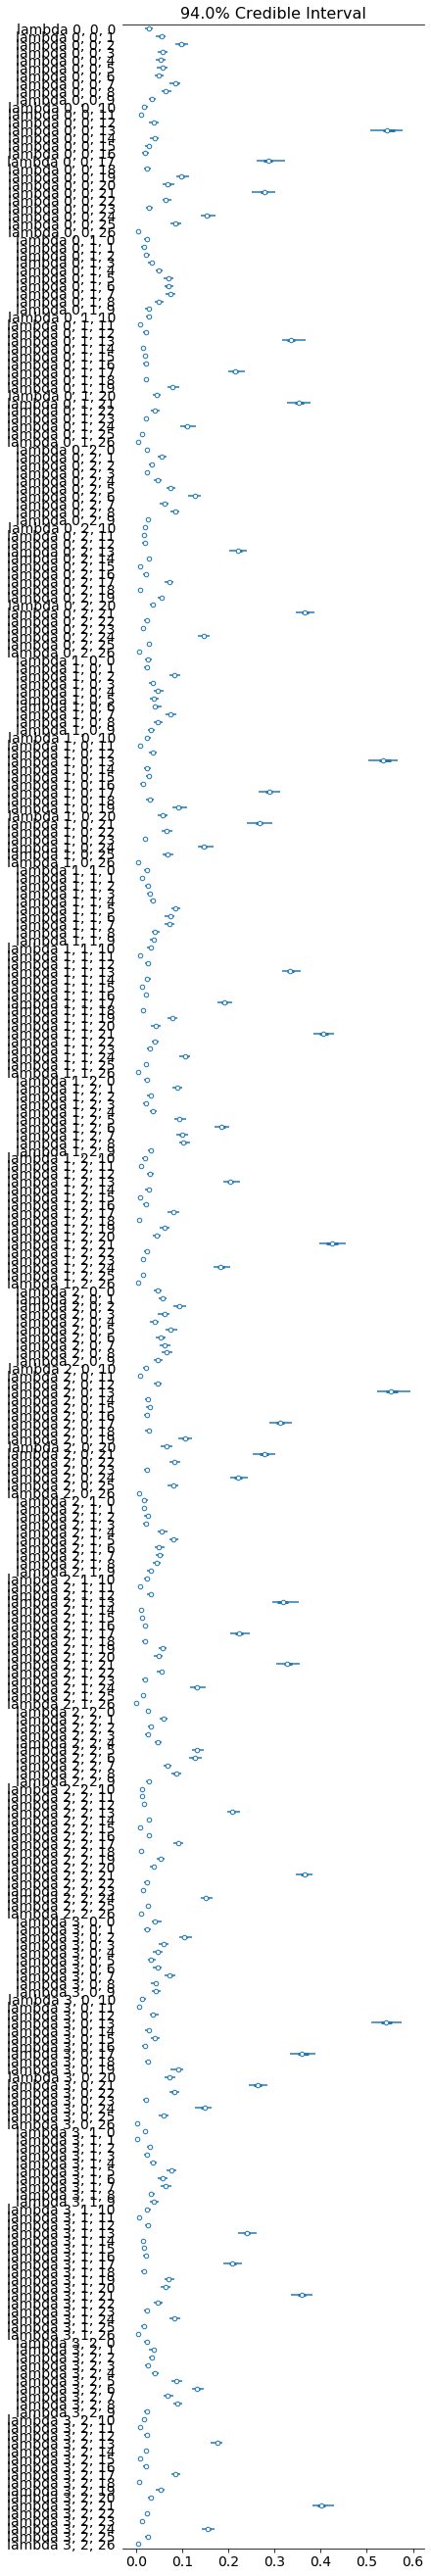

In [65]:
pm.forestplot(trace[::100], var_names = ['a_tau','b_tau']);
pm.forestplot(trace[::100], var_names = ['lambda_nrn']);
# pm.forestplot(trace[::100], var_names = 'tau');
pm.forestplot(trace[::100], var_names = ['lambda_state']);
pm.forestplot(trace[::100], var_names = ['lambda']);

# pm.forestplot(trace, var_names = ['a_tau','b_tau']);
# pm.forestplot(trace, var_names = 'tau');
# pm.forestplot(trace, var_names = ['a_lambda','b_lambda']);
# pm.forestplot(trace, var_names = ['a_lambda_state','b_lambda_state']);
# pm.forestplot(trace, var_names = ['lambda']);

In [66]:
lambda_stack = trace['lambda'].swapaxes(0,1)
tau_samples = trace['tau']
print(tau_samples.shape)
print(lambda_stack.shape)

(10000, 120, 2)
(4, 10000, 3, 27)


In [67]:
mean_tau = np.mean(tau_samples, axis=0)
mean_lambda = np.mean(lambda_stack,axis=1).swapaxes(1,2)
print(mean_tau.shape)
print(mean_lambda.shape)

(120, 2)
(4, 27, 3)


(4, 27, 3)
(4, 27, 3)


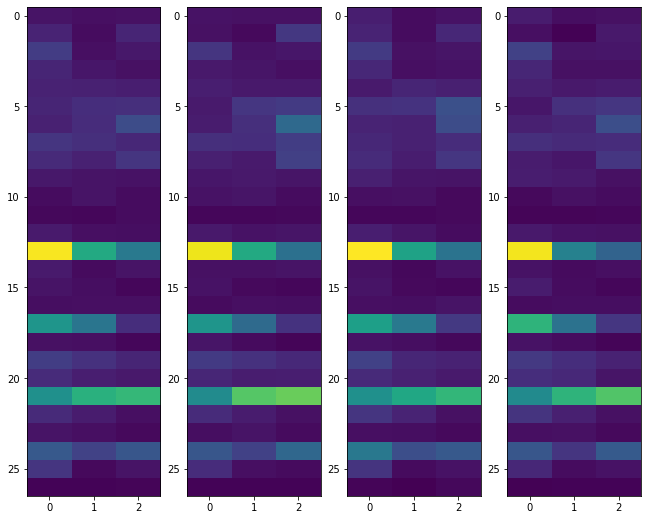

<Figure size 792x648 with 0 Axes>

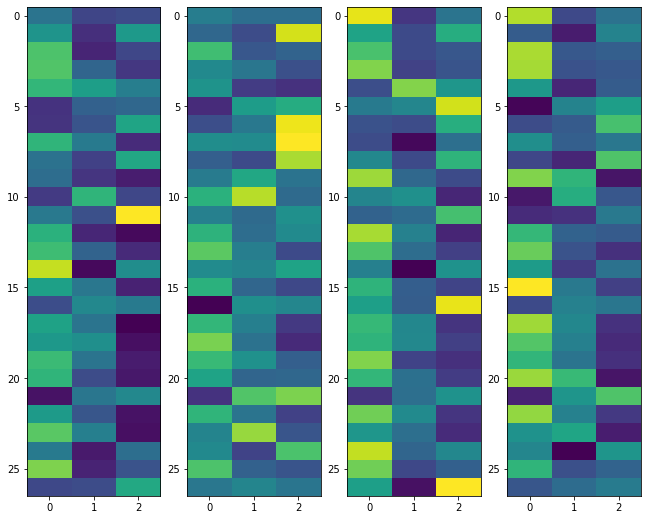

In [68]:
fig,ax = plt.subplots(1,mean_lambda.shape[0]);
for this_ax, this_dat in zip(ax, mean_lambda):
    this_ax.imshow(this_dat, interpolation = 'nearest', aspect = 'auto', cmap = 'viridis',
                                      vmin = 0, vmax = np.max(mean_lambda,axis=None))

plt.figure();
zscore_mean_lambda = np.array([stats.zscore(nrn,axis=None) for nrn in mean_lambda.swapaxes(0,1)]).swapaxes(0,1)
print(mean_lambda.shape)
print(zscore_mean_lambda.shape)
fig,ax = plt.subplots(1,mean_lambda.shape[0]);
for this_ax, this_dat in zip(ax, zscore_mean_lambda):
    this_ax.imshow(this_dat, interpolation = 'nearest', aspect = 'auto', cmap = 'viridis')



In [69]:
# # Chunk subplots by state
# swapped_mean_lambda = mean_lambda.swapaxes(0,-1)
# print(swapped_mean_lambda.shape)
# fig,ax = plt.subplots(1,swapped_mean_lambda.shape[0]);
# for num,(this_ax, this_dat) in enumerate(zip(ax, swapped_mean_lambda)):
#     this_ax.imshow(stats.zscore(this_dat,axis=-1), interpolation = 'nearest', aspect = 'auto', cmap = 'viridis')
#     this_ax.set_title('State {}'.format(num))

In [70]:
ppc = pm.sample_posterior_predictive(trace, samples = 2000, model = model)
ppc['obs'].shape

/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
  0%|          | 0/2000 [00:00<?, ?it/s]/home/abuzarmahmood/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
100%|██████████| 2000/2000 [01:33<00:00, 21.37it/s]


(2000, 120, 27, 250)

In [71]:
mean_ppc = np.mean(ppc['obs'],axis=0)
std_ppc = np.std(ppc['obs'],axis=0)
print(mean_ppc.shape)

(120, 27, 250)


In [72]:
mean_mean_tau = np.mean(tau_samples,axis=(0,1))
mean_mean_ppc = np.mean(mean_ppc,axis=1)
zscore_mean_mean_ppc = np.array([stats.zscore(nrn,axis=None) for nrn in mean_mean_ppc.swapaxes(0,1)]).swapaxes(0,1)
print(mean_mean_tau.shape)
print(mean_mean_ppc.shape)
print(zscore_mean_mean_ppc.shape)

(2,)
(120, 250)
(120, 250)


(1200000, 2)


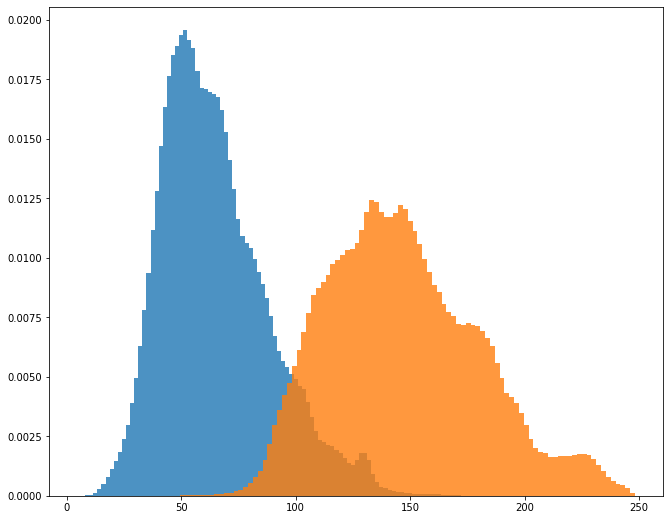

In [73]:
long_tau_samples = tau_samples.reshape((-1, tau_samples.shape[-1]))
print(long_tau_samples.shape)
for switch in range(long_tau_samples.shape[-1]):
     plt.hist(long_tau_samples[...,switch],bins = 100, density = True,alpha = 0.8)
    
# for this_ax in ax[-1,:]:
#     this_ax.set_xticks(np.arange(0,len(binned_t_vec),tick_interval));
#     this_ax.set_xticklabels(binned_t_vec[::tick_interval],rotation='vertical');

In [74]:
zscore_mean_ppc = stats.zscore(mean_ppc, axis=(0,1))
print(zscore_mean_ppc.shape)

(120, 27, 250)


In [75]:
plot_spikes = dat_binned_long>0

(120, 10, 2500)
[ 568.721593   1234.61280435]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
(120, 2)
(2500,)


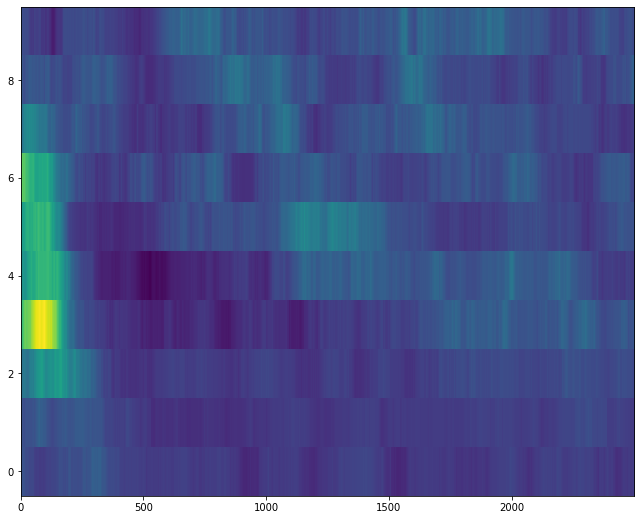

In [76]:
channel = 12
stft_cut = stats.zscore(dat.amplitude_array,axis=-1)
stft_cut = stft_cut[:,12,...,time_lims[0]:time_lims[1]]
stft_cut = np.reshape(stft_cut,(-1,*stft_cut.shape[2:]))
print(stft_cut.shape)
stft_ticks = dat.time_vec[time_lims[0]:time_lims[1]]*1000
stft_tick_inds = np.arange(0,len(stft_ticks),250)
visualize.imshow(np.median(stft_cut,axis=0))

mean_tau_stft = (mean_tau/np.max(mean_tau,axis=None))*stft_cut.shape[-1]
print(mean_tau_stft[0])
print(dat.freq_vec)
print(mean_tau_stft.shape)
print(stft_ticks.shape)

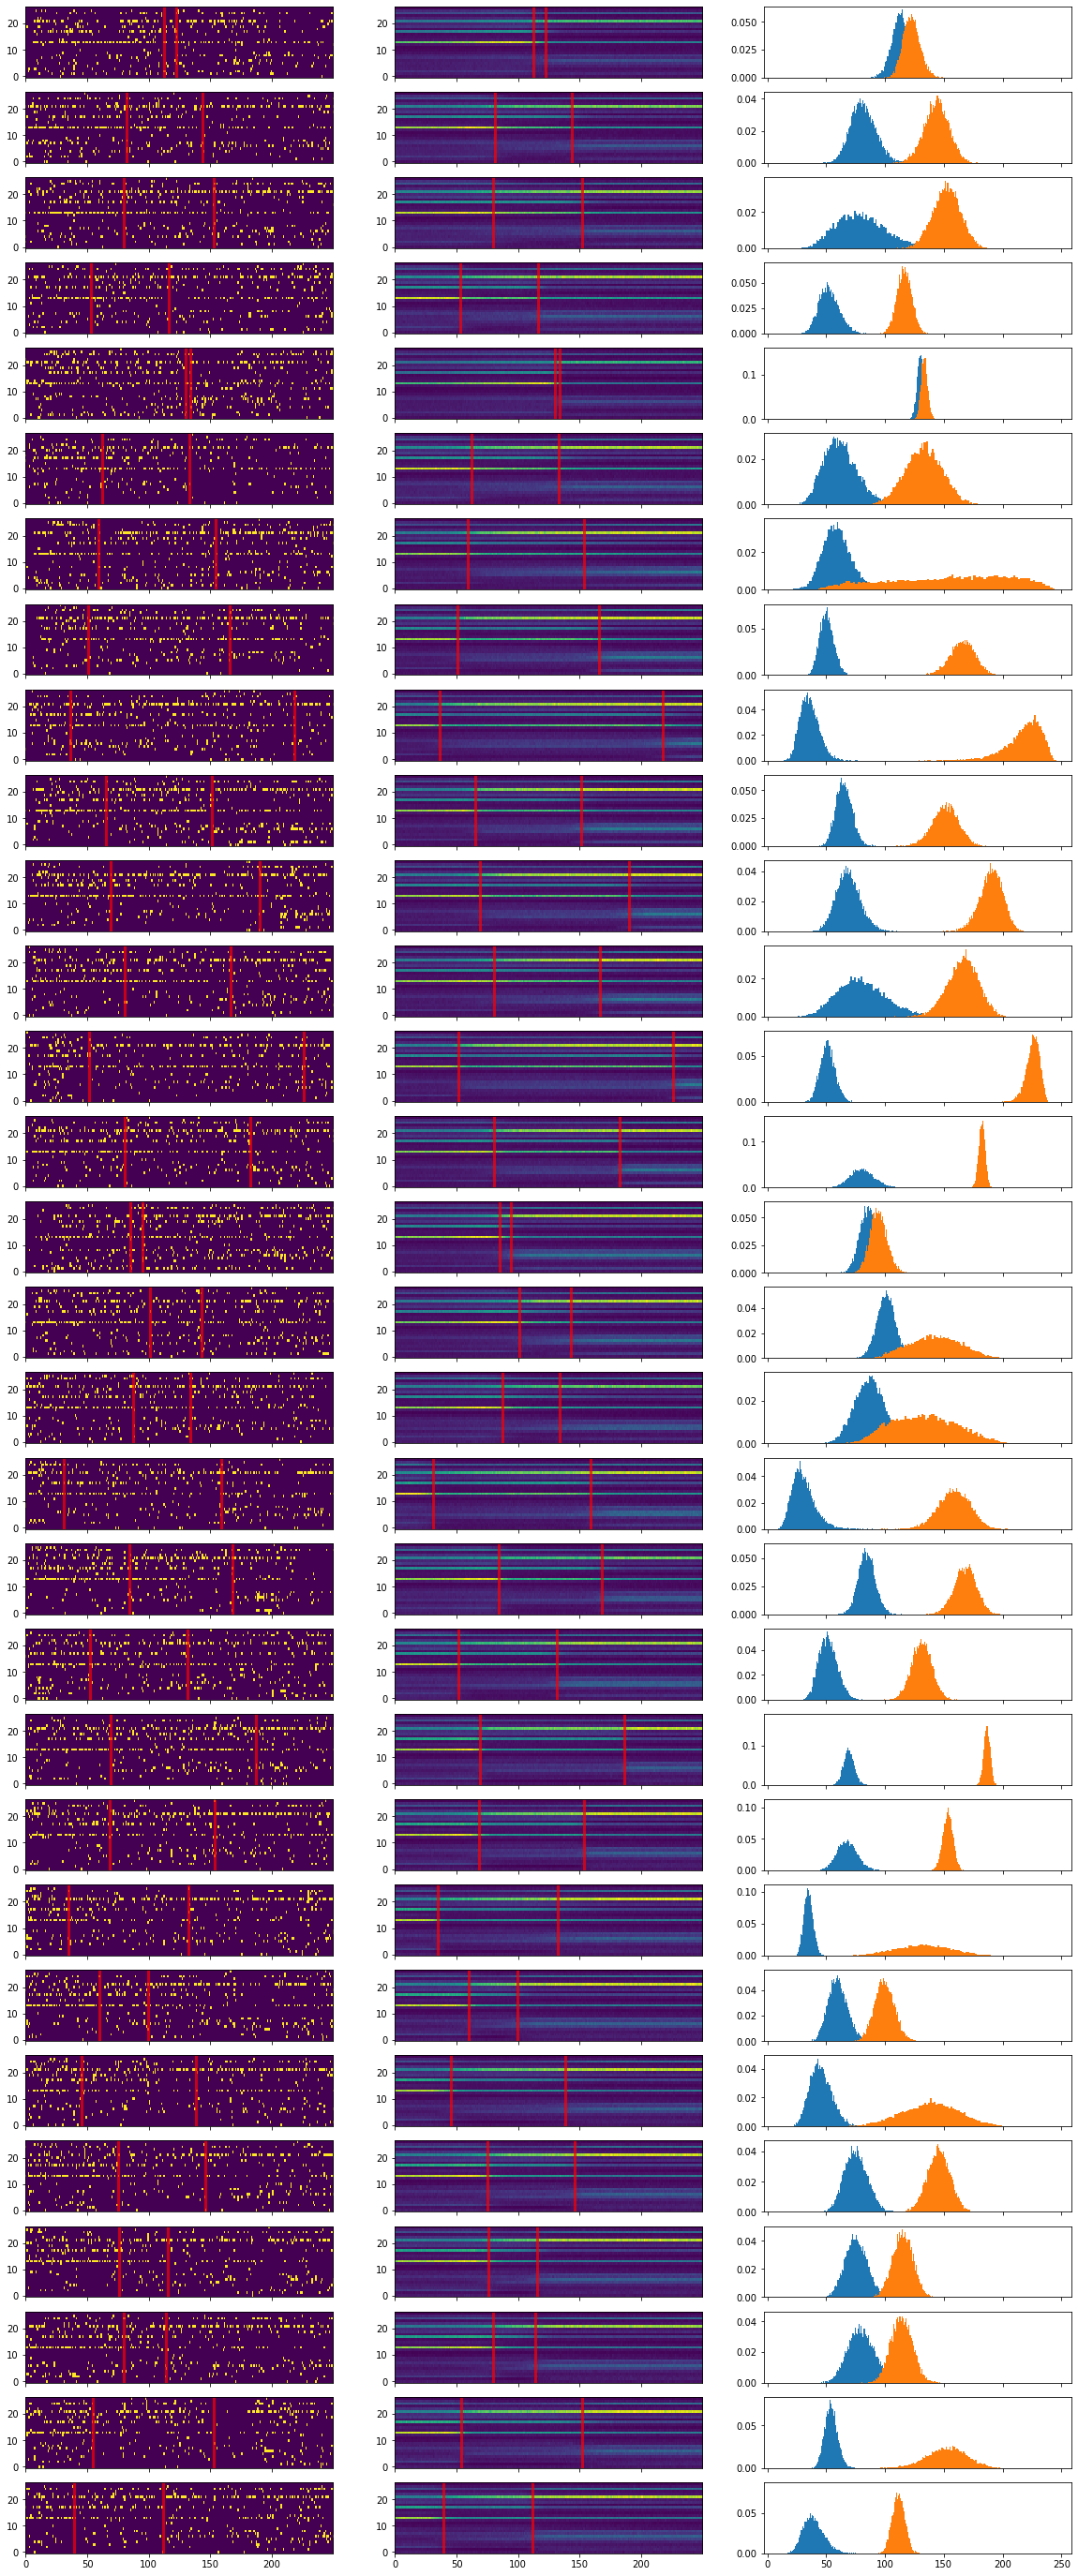

In [77]:
# Overlay raster with CDF of switchpoints
trial_count = 30
tick_interval = 5
trial_inds = np.sort(np.random.choice(np.arange(mean_ppc.shape[0]),trial_count, replace = False))

fig, ax = plt.subplots(trial_count,3,sharex='col', figsize = (20,50))
for num,trial in enumerate(trial_inds):
    ax[num,0].imshow(plot_spikes[trial],aspect='auto',origin='lower')
    #ax[num,1].imshow(stft_cut[trial],interpolation='nearest',aspect='auto',origin='lower')
    ax[num,1].imshow(zscore_mean_ppc[trial], aspect='auto',origin='lower')
    ax[num,0].vlines(mean_tau[trial],-0.5,zscore_mean_ppc.shape[1]-0.5,color = 'red',linewidth = 3, alpha = 0.7)
    #ax[num,1].vlines(mean_tau_stft[trial],-0.5,stft_cut.shape[1]-0.5,color = 'red',linewidth = 3, alpha = 0.7)
    ax[num,1].vlines(mean_tau[trial],-0.5,zscore_mean_ppc.shape[1]-0.5,color = 'red',linewidth = 3, alpha = 0.7)
    
    #ax[num,1].set_xticks(stft_tick_inds)
    #ax[num,1].set_xticklabels(stft_ticks[stft_tick_inds],rotation='vertical')

    for state in range(tau_samples.shape[-1]):
        ax[num,2].hist(tau_samples[:,trial,state], bins = 100, density = True)

# for col in [0,2,3]:
#     plt.sca(ax[-1,col])
#     plt.xticks(np.arange(0,len(binned_t_vec),tick_interval),binned_t_vec[::tick_interval],rotation='vertical');
#     plt.xlim(0,len(binned_t_vec))


In [81]:
# See whether you can extract differences in valve opening times from transition points
taste_tau = []
for taste in sorted(set(taste_label)):
    taste_tau.append(mean_tau[taste_label==taste])
taste_tau = np.array(taste_tau)
print(taste_tau.shape)
taste_mean_tau = np.mean(taste_tau,axis=1)
taste_mean_time = taste_mean_tau[:,0]*bin_width
print(taste_mean_time - np.min(taste_mean_time))

(4, 30, 2)
[15.11727592 78.35404986 65.89595984  0.        ]


In [103]:
# For visualization
# Take firing around each transition and stack it together to make a PSTH (not mean firing)
# Perform alignemnt on uncut data (0-7000 ms) so there are no missing parts
# (in case a changepoint is too close to the start or the end)
# Before and after alignment
window_radius_time = 300 # ms
window_radius_bins = window_radius_time//bin_width
print(window_radius_bins)

# To translate the changepoints according to the start of the whole trial
mean_tau += time_lims[0]//bin_width

# Convert tau to interegers
int_mean_tau = np.vectorize(np.int)(mean_tau)

print(dat_binned_long.shape)
print(int_mean_tau.shape)

30
(120, 27, 250)
(120, 2)


In [104]:
# Take entire radius if available or whatever there is otherwise
# Iterate over changepoints and trials
# trials x neuron x switches x window_diameter
aligned_spikes = np.ones((*whole_dat_binned_long.shape[:2],mean_tau.shape[-1],window_radius_bins*2))*-1
print(aligned_spikes.shape)

(120, 27, 2, 60)


In [105]:
# Spikes aligned to trial-specific transitions
for trial in range(whole_dat_binned_long.shape[0]):
    for switch in range(mean_tau.shape[-1]):
        
        # Check whether we can pick out a window
        lower_bound = (int_mean_tau[trial,switch] - window_radius_bins)
        fin_lower_bound = lower_bound * (lower_bound > 0)
        upper_bound = (int_mean_tau[trial,switch] + window_radius_bins)
        fin_upper_bound = upper_bound * (upper_bound < whole_dat_binned_long.shape[-1]) + \
                                            whole_dat_binned_long.shape[-1] * (upper_bound > whole_dat_binned_long.shape[-1])

        # Done this way so all windows can be accomodated whether they are of the expected size or not
        lower_window = whole_dat_binned_long[trial,:,fin_lower_bound:int_mean_tau[trial,switch]]
        upper_window = whole_dat_binned_long[trial,:,int_mean_tau[trial,switch]:fin_upper_bound]
        #If window is smaller than the expected size, put it in centered on transition
        aligned_spikes[trial,:,switch,(window_radius_bins - lower_window.shape[-1]):window_radius_bins] = lower_window
        aligned_spikes[trial,:,switch,window_radius_bins:(window_radius_bins + upper_window.shape[-1])] = upper_window

In [106]:
# Spikes aligned to average transitions
unaligned_spikes = np.ones((*whole_dat_binned_long.shape[:2],mean_tau.shape[-1],window_radius_bins*2))*-1
print(unaligned_spikes.shape)
int_unaligned_tau = np.vectorize(np.int)(np.mean(mean_tau,axis=0))
# Spikes aligned to trial-specific transitions
for switch in range(int_unaligned_tau.shape[-1]):

    # Check whether we can pick out a window
    lower_bound = (int_unaligned_tau[switch] - window_radius_bins)
    fin_lower_bound = lower_bound * (lower_bound > 0)
    upper_bound = (int_unaligned_tau[switch] + window_radius_bins)
    fin_upper_bound = upper_bound * (upper_bound < whole_dat_binned_long.shape[-1]) + \
                                        whole_dat_binned_long.shape[-1] * (upper_bound > whole_dat_binned_long.shape[-1])

    # Done this way so all windows can be accomodated whether they are of the expected size or not
    lower_window = whole_dat_binned_long[:,:,fin_lower_bound:int_unaligned_tau[switch]]
    upper_window = whole_dat_binned_long[:,:,int_unaligned_tau[switch]:fin_upper_bound]
    #If window is smaller than the expected size, put it in centered on transition
    unaligned_spikes[:,:,switch,(window_radius_bins - lower_window.shape[-1]):window_radius_bins] = lower_window
    unaligned_spikes[:,:,switch,window_radius_bins:(window_radius_bins + upper_window.shape[-1])] = upper_window

(120, 27, 2, 60)


In [107]:
# break down aligned_spikes by taste
aligned_list = []
for taste in sorted(set(taste_label)):
    aligned_list.append(aligned_spikes[taste_label==taste])
taste_aligned_spikes = np.array(aligned_list)
print(taste_aligned_spikes.shape)

(4, 30, 27, 2, 60)


(27, 2, 120, 60)


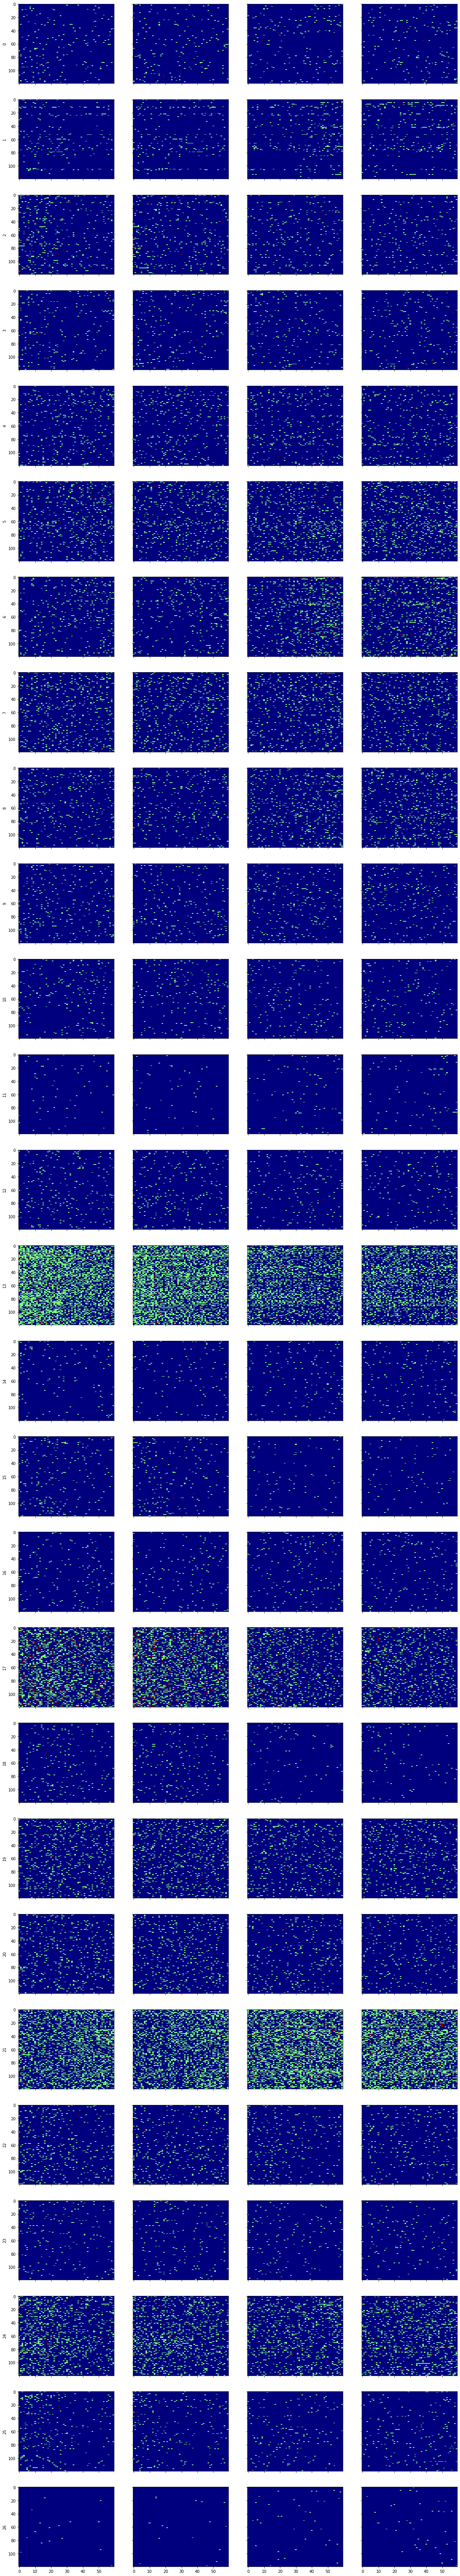

In [113]:
plot_dat_aligned = np.moveaxis(aligned_spikes,0,2)
plot_dat_unaligned = np.moveaxis(unaligned_spikes,0,2)
print(plot_dat_aligned.shape)

fig, ax = plt.subplots(plot_dat_aligned.shape[0],plot_dat_aligned.shape[1]*2,
                      sharex=True, sharey=True, figsize=(20,120))
iters = np.ndindex(plot_dat_aligned.shape[:2])
for this_iter in iters:
    #spikes = np.where(plot_dat[this_iter])
    #this_ax.scatter(spikes[1],spikes[0],s=2,alpha=0.7,marker = "|")
    ax[this_iter[0],2*this_iter[1]].imshow(plot_dat_aligned[this_iter[0],this_iter[1]],aspect='auto',cmap='jet',vmin=0,vmax=2)
    ax[this_iter[0],(2*this_iter[1])+1].imshow(plot_dat_unaligned[this_iter[0],this_iter[1]],aspect='auto',cmap='jet',vmin=0,vmax=2)
    
for num,this_ax in enumerate(ax[:,0].flatten()):
    this_ax.set_ylabel(num)

(27, 2, 4, 60)


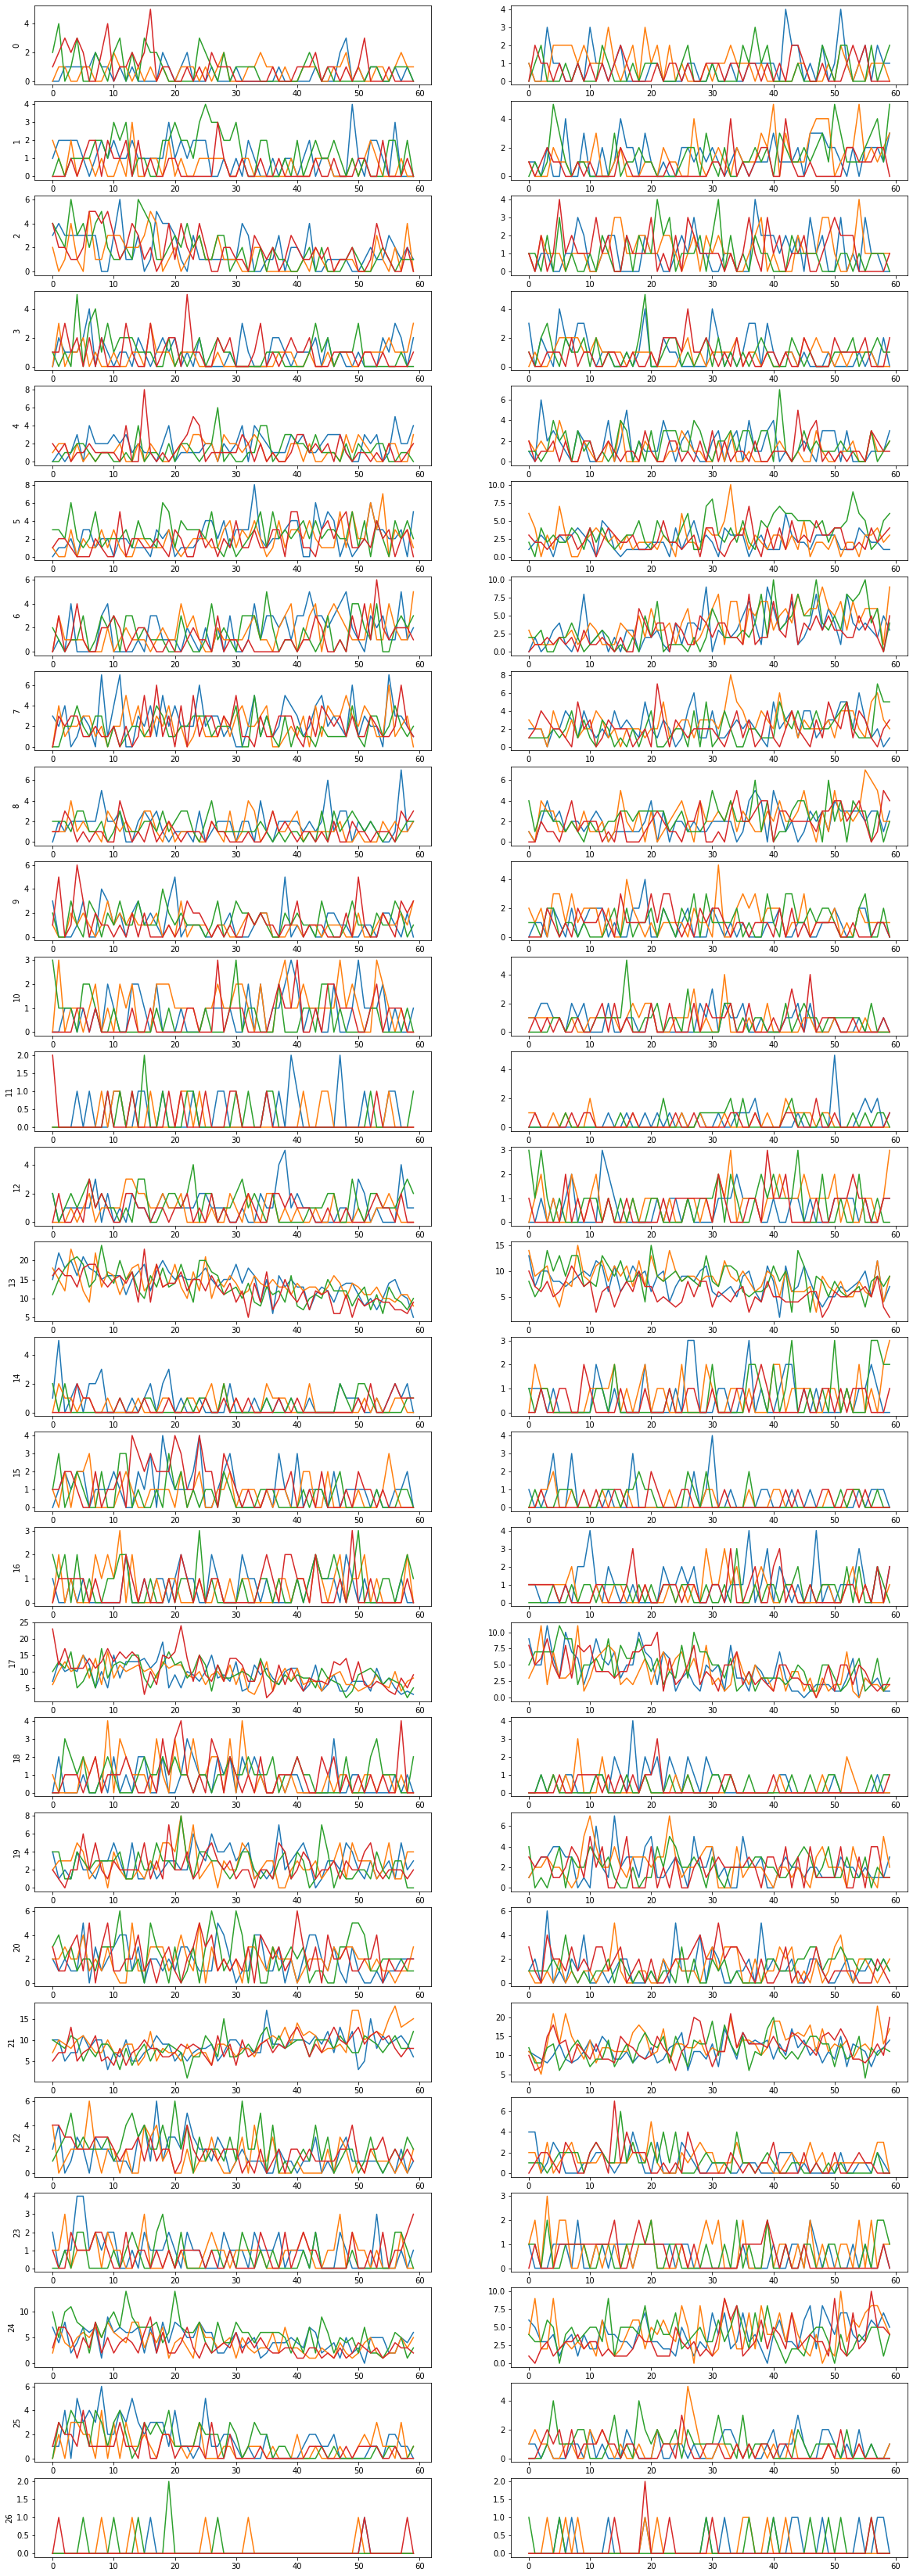

In [109]:
sum_aligned_taste_spikes = np.moveaxis(np.sum(taste_aligned_spikes,axis=1),0,2)
print(sum_aligned_taste_spikes.shape)
fig, ax = plt.subplots(sum_aligned_taste_spikes.shape[0],sum_aligned_taste_spikes.shape[1],
                      figsize = (20,60))
iters = np.ndindex(ax.shape)
for this_iter,this_ax in zip(iters,ax.flatten()):
    this_ax.plot(sum_aligned_taste_spikes[this_iter].T)
for num,this_ax in enumerate(ax[:,0].flatten()):
    this_ax.set_ylabel(num)

(27, 2, 60)
(27, 2, 60)


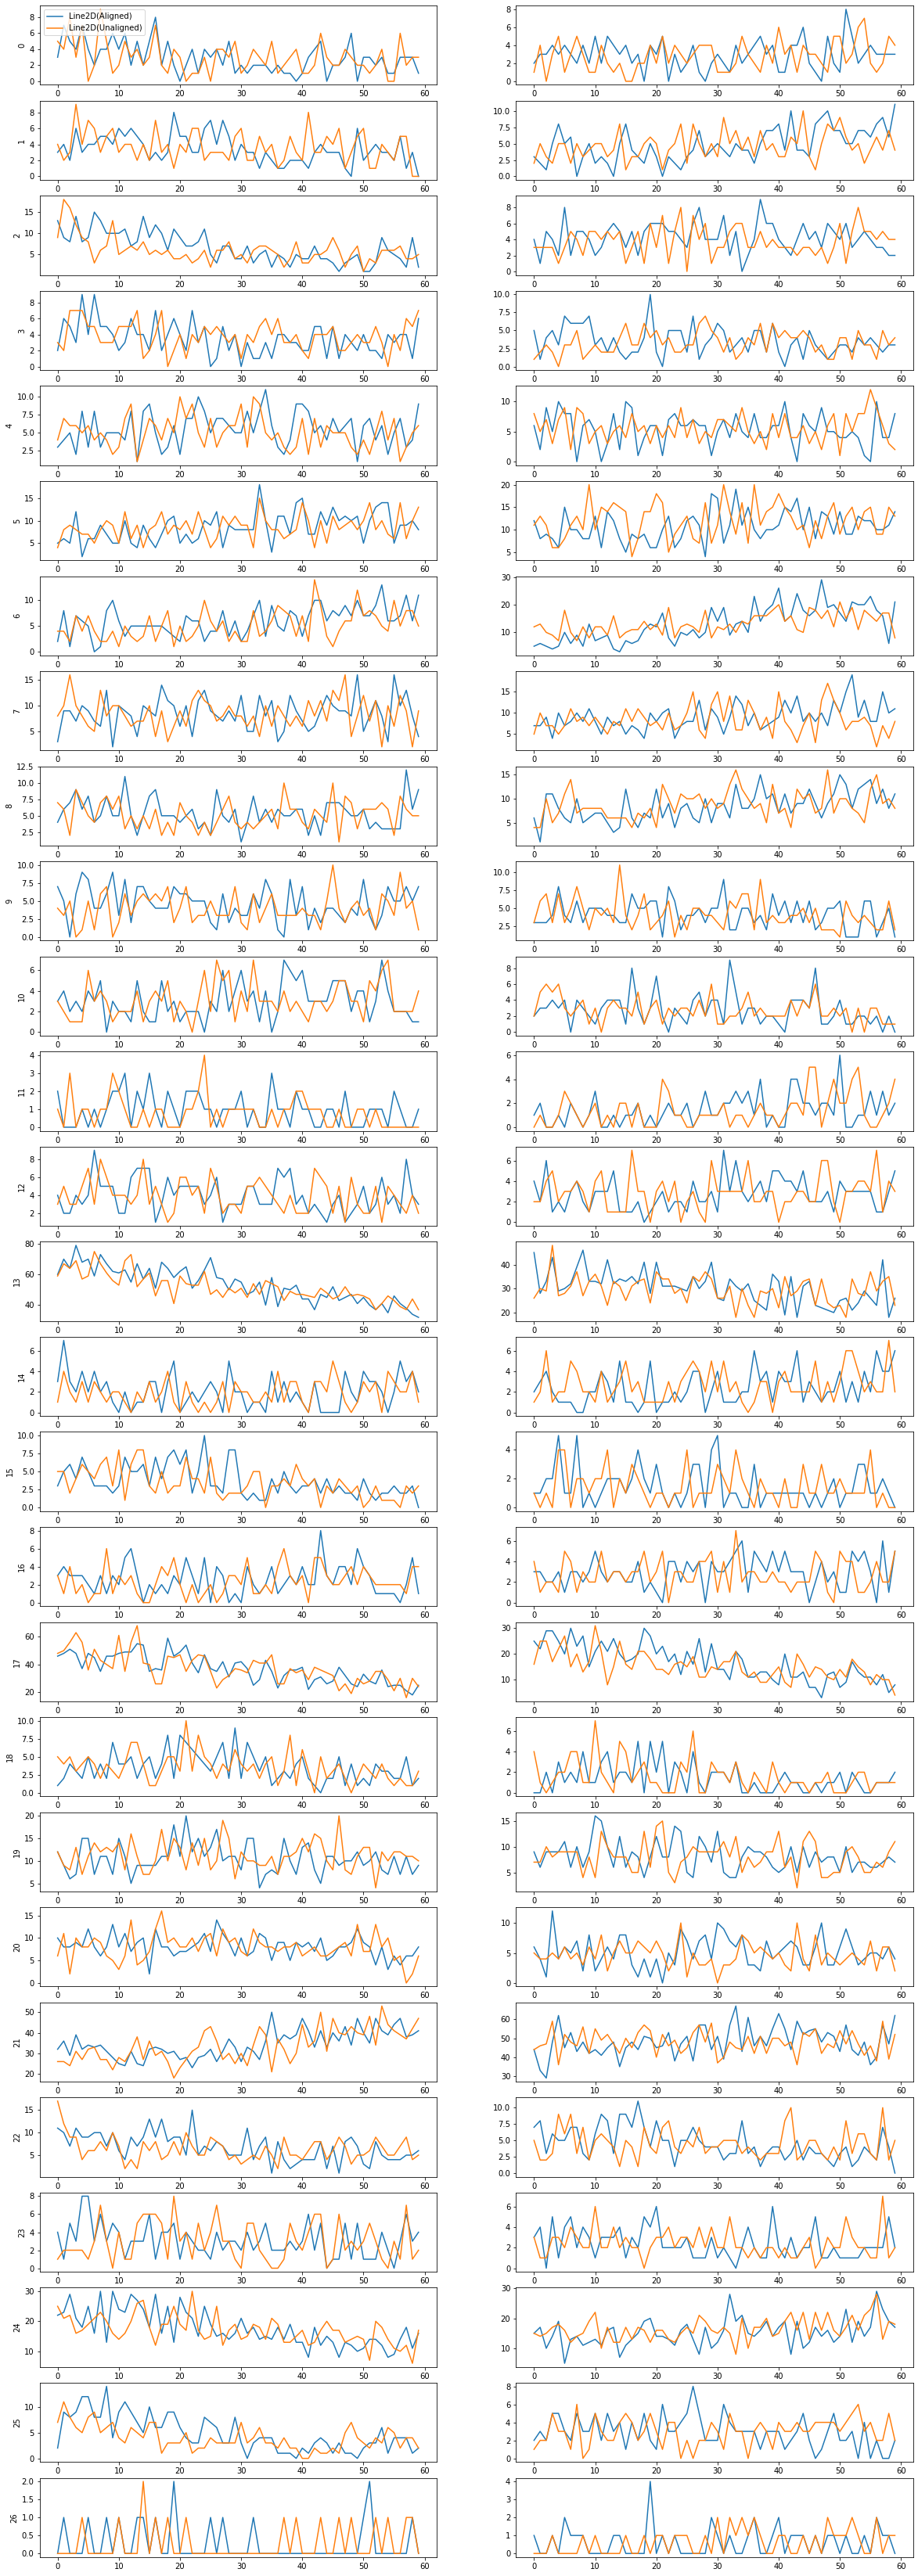

In [110]:
## Compare mean aligned psth (across all tastes) to mean psth at mean changepoint time
sum_aligned_spikes = np.sum(plot_dat_aligned,axis=2)
sum_unaligned_spikes = np.sum(plot_dat_unaligned,axis=2)
print(sum_aligned_spikes.shape)
print(sum_unaligned_spikes.shape)
fig, ax = plt.subplots(sum_aligned_spikes.shape[0],sum_aligned_spikes.shape[1],
                      figsize = (20,60))
iters = np.ndindex(ax.shape)
for this_iter,this_ax in zip(iters,ax.flatten()):
    this_ax.plot(sum_aligned_spikes[this_iter])
    this_ax.plot(sum_unaligned_spikes[this_iter])
for num,this_ax in enumerate(ax[:,0].flatten()):
    this_ax.set_ylabel(num)
plt.sca(ax[0,0])
plt.legend([Line2D([0],[0],label = 'Aligned',color='blue'), 
            Line2D([0],[0],label = 'Unaligned', color = 'orange')],
          loc = 'upper left');